In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet
/kaggle/input/flight-delay-dataset-20182022/Airlines.csv
/kaggle/input/flight-delay-dataset-20182022/readme.md
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2020.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2019.csv
/kaggle/input/flight-delay-dataset-20182022/readme.html
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2021.csv
/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet
/kaggle/input/flight-delay-dataset-20182022/raw/Flights_2018_7.csv
/kaggle/input/flight-delay-dataset-20182022/ra

# Introduction

### What we will be doing with this dataset:
- We will be using this dataset to effectively and accurately predict length of time for flight delays. We will use various regression and machine learning techniques to learn from the training data and then test our prediction models with our test data.

### Why we chose this dataset:
- We chose the given dataset as it is both rich and robust. The size allows us to adjust various factors in order to observe common phenomena. The number of columns allows us to explore which variables affect flight delays; whereas, the number of rows ensure we have enough data to make good judgements.

### What results we hope to achieve:
- We aim to predict the length of flight delays with high confidence.

### Section 1: Load data from CSV into Pandas Dataframe

In [2]:
# This dataset in its entirety is very large, containing millions and millions of records, which is going to
# be quite costly to compute over. We feel that we can generate a sufficent level of accuracy by computing
# over a subset of the data. We have chosen to work with 2018 with the idea that the years 2020-2022 will 
# likely be biased by the events and effects of the COVID-19 pandemic.

df_flights_2018 = pd.read_csv("/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2018.csv")

# Because we have such an abundance of data, we are not necessarily concerned with dropping values in place. 
# We would most certainly consider value imputation instead of simply dropping NA values, if our dataset were
# not so rich.

df_flights_2018.dropna(inplace = True)

In [3]:
# Visualize dataframe to ensure it loaded correctly
df_flights_2018.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [4]:
# Vizualize columns and data types 
df_flights_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578618 entries, 0 to 5689511
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

### Section 2: Initial Data Cleaning and Wrangling

In [5]:
# Cast FlightDate column to datetime format
df_flights_2018["FlightDate"] = pd.to_datetime(df_flights_2018["FlightDate"])

# Cast Airline column to String
df_flights_2018["Airline"] = df_flights_2018["Airline"].astype(str)

# Change Origin and Destination columns to String
df_flights_2018["Origin"] = df_flights_2018["Origin"].astype(str)
df_flights_2018["Dest"] = df_flights_2018["Dest"].astype(str)

# Now we want to remove any 'known' values that could predict the outcome. For example, DepDel15 would 
# indicate we're going to be delayed and bias the model. So we're going to drop all these values 
# that we would not know in advance while we're waiting for a plane to take off. This includes 
# all the arrival values, diverted values, cancelled values, etc... We also remove a lot of the 
# redudant location information to make the dataset more manageable with regard to memory size.
keeper_columns = ["Quarter","DayOfWeek", "FlightDate",
                  "Airline","Origin", "OriginState",
                  "Dest", "DestState","CRSDepTime",
                  "Distance", "DepDelayMinutes"]

# Save a smaller projection of our original (large) dataset to work with
df_flights_2018_clean = df_flights_2018[keeper_columns].copy() # IS .COPY() METHOD REDUNDANT HERE?

# DepDelay is our target column for prediction. Let's rename that as dep_min_delay for readability.
df_flights_2018_clean.rename(columns={"DepDelayMinutes": "dep_min_delay"}, inplace=True)

# CRSDepTime and DepTimeBlk are unclear. Let's rename those for readability.
df_flights_2018_clean.rename(columns={"CRSDepTime": "schedule_dep_time", 
                                      "DepTimeBlk": "scheduled_dep_block"}, inplace=True)

# Convert the type of our target value - dep_min_delay - to int and round it
df_flights_2018_clean["dep_min_delay"] = df_flights_2018_clean["dep_min_delay"].round().astype(int)

# Convert Distance column to int 
df_flights_2018_clean["Distance"] = df_flights_2018_clean["Distance"].astype(int)

# Adjusting our date time fields (year, month, day)
# Handling datetime data (if applicable)
df_flights_2018_clean['Year'] = df_flights_2018_clean['FlightDate'].dt.year # IT SEEMS LIKE WE WOULD NOT NEED THIS AS 
# ALL DATA IS IN THE SAME YEAR - 2018
df_flights_2018_clean['Month'] = df_flights_2018_clean['FlightDate'].dt.month
df_flights_2018_clean['Day'] = df_flights_2018_clean['FlightDate'].dt.day

In [6]:
# To save memory we now delete our original dataset
# del df_flights_2018
# gc.collect()

In [7]:
# Visualize our DataFrame to ensure all operations were a success

df_flights_2018_clean.head()

,Quarter,DayOfWeek,FlightDate,Airline,Origin,OriginState,Dest,DestState,schedule_dep_time,Distance,dep_min_delay,Year,Month,Day
0,1,2,2018-01-23,Endeavor Air Inc.,ABY,GA,ATL,GA,1202,145,0,2018,1,23
1,1,3,2018-01-24,Endeavor Air Inc.,ABY,GA,ATL,GA,1202,145,0,2018,1,24
2,1,4,2018-01-25,Endeavor Air Inc.,ABY,GA,ATL,GA,1202,145,0,2018,1,25
3,1,5,2018-01-26,Endeavor Air Inc.,ABY,GA,ATL,GA,1202,145,0,2018,1,26
4,1,6,2018-01-27,Endeavor Air Inc.,ABY,GA,ATL,GA,1400,145,0,2018,1,27


In [8]:
df_flights_2018_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578618 entries, 0 to 5689511
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Quarter            int64         
 1   DayOfWeek          int64         
 2   FlightDate         datetime64[ns]
 3   Airline            object        
 4   Origin             object        
 5   OriginState        object        
 6   Dest               object        
 7   DestState          object        
 8   schedule_dep_time  int64         
 9   Distance           int64         
 10  dep_min_delay      int64         
 11  Year               int64         
 12  Month              int64         
 13  Day                int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 638.4+ MB


In [9]:
# Despite our previous efforts to reduce the absolute size of our data, like prioritizing data from 2018,
# our dataframe is still very large. 

original_length = len(df_flights_2018_clean) # variable used later for printing
print("At this point, our dataset still contains this many observations: " + str(len(df_flights_2018_clean)))

At this point, our dataset still contains this many observations: 5578618


In [10]:
# That's a lot of rows! So, before we start our ML modeling, we need to reduce the dataset even further. 
# It seems reasonable to try to trim down the airports, both as origins and destinations, because this 
# will take a large number of additional columns (and thus a lot of extra memory) to achieve 
# one-hot encoding.

# Calculate the top 20 most popular airports for departures
origin_counts = df_flights_2018_clean['Origin'].value_counts()
top_origins = origin_counts.head(20)
print(top_origins) # top_origins is of type 'Series' here

ORD    282770
DEN    249288
ATL    221242
LAX    181472
IAH    161187
SFO    154833
EWR    145580
LAS    143054
SEA    130912
DFW    129181
PHX    117148
MCO    115943
BOS    112322
CLT    109738
DTW     98097
LGA     95210
BWI     95197
MSP     88652
FLL     86451
IAD     84340
Name: Origin, dtype: int64


In [11]:
# Calculate the top 20 most popular airports for arrivals

dest_counts = df_flights_2018_clean['Dest'].value_counts()
top_dest = dest_counts.head(20)
print(top_dest) # top_dest is of type 'Series' here

ORD    282130
DEN    248875
ATL    221544
LAX    181687
IAH    160930
SFO    154863
EWR    145303
LAS    143180
SEA    130771
DFW    128629
PHX    116948
MCO    115777
BOS    112434
CLT    109519
DTW     98349
BWI     95016
LGA     95002
MSP     88739
FLL     86389
IAD     84278
Name: Dest, dtype: int64


In [12]:
# Now that we have our most popular destination and arrival airports, how many unique values are 
# represented between these 2 lists?

different_values = len(set(list(top_origins.reset_index()['index'])) ^ set(list(top_dest.reset_index()['index'])))

print("There are " + str(different_values) + " different values between the top 20 destination and arrival airports.")
print("Wow, it actually looks like the lists are exactly the same, even their order!")

There are 0 different values between the top 20 destination and arrival airports.
Wow, it actually looks like the lists are exactly the same, even their order!


In [13]:
# Reduce our dataset even further by filtering out any observation whose origin AND destination 
# is not among the list of most popular airports that we computed above. Then visualize how 
# many observations were removedfrom our dataset after each step.

# First we filter out any observation whose origin airport is not among the most popular airports computed above
df_flights_2018_clean_reduced = df_flights_2018_clean[df_flights_2018_clean['Origin'].isin(top_origins.index)]
reduced_1 = len(df_flights_2018_clean_reduced)

# Next we filter out any observation whose destination airport is not among the most popular airports computed above
df_flights_2018_clean_reduced = df_flights_2018_clean_reduced[df_flights_2018_clean_reduced['Dest'].isin(top_dest.index)]
reduced_2 = len(df_flights_2018_clean_reduced)

# Display results 
print("Our original dataset had this many observations: " + str(original_length)) # original is 5.5 million rows
print("After filtering on origin airports, it's now: " 
      + str(reduced_1)) # after filtering origin 2.8 million rows
print("After filtering on destination airports, it's now: " 
      + str(reduced_2)) # now 1.1 million rows
print("\nWow, we reduced our dataset by around " + str(round(100 *(1 - (reduced_2/original_length)), 2)) + " percent!")

Our original dataset had this many observations: 5578618
After filtering on origin airports, it's now: 2802617
After filtering on destination airports, it's now: 1113556

Wow, we reduced our dataset by around 80.04 percent!


### Section 3: Exploratory Data Analysis (EDA)

In [14]:
# Now we want to make sure we haven't biased our data in some way by filtering as we have. Let's 
# verify a few statistics about our new working dataset to ensure we still have enough variety.

# How many airlines are represented in our now filtered DataFrame
print("Unique values in Airline column:", df_flights_2018_clean_reduced['Airline'].nunique())
#Ok, we still have 22 different airlines represented. This is good.

# How many different states appear among our departure airports
print("\nUnique states in OriginState column:", df_flights_2018_clean_reduced['OriginState'].nunique())

# How many different states appear among our arrival airports
print("\nUnique states in DestState column:", df_flights_2018_clean_reduced['OriginState'].nunique())

Unique values in Airline column: 22

Unique states in OriginState column: 17

Unique states in DestState column: 17


<Figure size 800x600 with 0 Axes>

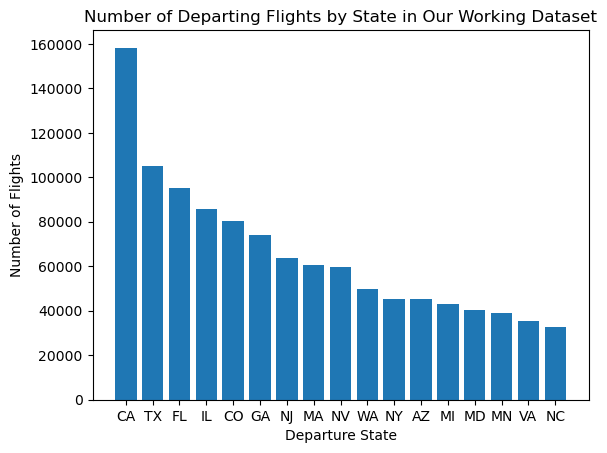

<Figure size 800x600 with 0 Axes>

In [15]:
# We feel that the values printed by the above cell are going to be a wide enough sample to 
# give us reliable results from our ML models. Now, let's explore our data a little bit.
# Firstly, let's visualize our states to see where the bulk of our data is coming from.

# Visualize most popular departure states
temp_df = df_flights_2018_clean_reduced['OriginState'].value_counts().reset_index()

plt.bar(temp_df['index'], temp_df['OriginState'], width=0.8, align='center')
plt.xlabel("Departure State")
plt.ylabel("Number of Flights")
plt.title("Number of Departing Flights by State in Our Working Dataset")
plt.figure(figsize=(8,6))



<Figure size 800x600 with 0 Axes>

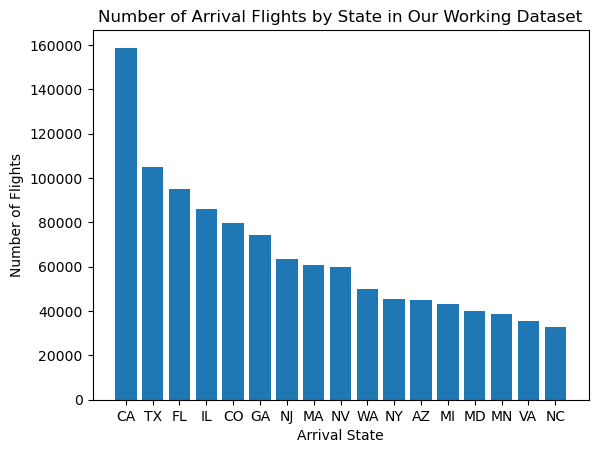

<Figure size 800x600 with 0 Axes>

In [16]:
# Visualize most popular destination states
temp_df2 = df_flights_2018_clean_reduced['DestState'].value_counts().reset_index()

plt.bar(temp_df2['index'], temp_df2['DestState'], width=0.8, align='center')
plt.xlabel("Arrival State")
plt.ylabel("Number of Flights")
plt.title("Number of Arrival Flights by State in Our Working Dataset")
plt.figure(figsize=(8,6))

In [17]:
# Visually, we can see that there are not 20 states in the above lists. That means that there are 
# multiple most popular airports in a single state as per the 'Pigeonhole Principle.' Yes, we did
# pay attention in Math Foundations 5920!

In [18]:
#Now let's see which airports have the most departure delays

#group by Origin and we want the dep_min_delay to get an average for all flights coming out of that airport
airport_delays = df_flights_2018_clean_reduced.groupby('Origin')['dep_min_delay'].mean()
#now we sort by descending value
airport_delays_sorted = airport_delays.sort_values(ascending=False)
print(airport_delays_sorted.head(20))

#Interesting. So EWR (Newark) has the worst average delay with 14.7 minutes, then Dallas is second with 13.3 mins of delay. 
#Seattle is the best of our major airports with only 8.03 mins of average delay.

Origin
EWR    17.931341
BOS    16.314066
DFW    16.153983
MCO    15.949080
LGA    15.807175
ORD    15.750035
FLL    14.669313
DEN    13.960658
BWI    13.850032
SFO    13.765634
IAD    13.574876
LAS    13.236586
CLT    13.141245
IAH    12.873830
PHX    12.770934
ATL    12.721729
DTW    11.548905
SEA    11.321615
LAX    11.310037
MSP    11.278221
Name: dep_min_delay, dtype: float64


In [19]:
#let's dig into the Newark data more to find out why the delays are so bad.
#which airlines at Newark have the worst delays?
#get the flights only from Newark
flights_from_EWR = df_flights_2018_clean_reduced[df_flights_2018_clean_reduced['Origin'] == 'EWR']

#groupby airline and rank the average delay
EWR_delays = flights_from_EWR.groupby('Airline')['dep_min_delay'].mean()
print(EWR_delays.sort_values(ascending=False))

#Wow! Hopefully you're not flying Commutiar or JetBlue anytime soon out of Newark!

Airline
Commutair Aka Champlain Enterprises, Inc.    33.449130
JetBlue Airways                              29.137893
GoJet Airlines, LLC d/b/a United Express     24.712707
SkyWest Airlines Inc.                        23.080597
United Air Lines Inc.                        17.828883
Endeavor Air Inc.                            17.422907
Spirit Air Lines                             17.165151
ExpressJet Airlines Inc.                     16.217718
Southwest Airlines Co.                       15.275273
Delta Air Lines Inc.                         13.630078
Alaska Airlines Inc.                         13.369603
Virgin America                               12.693204
American Airlines Inc.                       12.576264
Republic Airlines                            11.540554
Envoy Air                                     9.394737
Name: dep_min_delay, dtype: float64


### Section 4: Prep for modeling

In [20]:
#First lets remind ourselves what our current dataset looks like
print(df_flights_2018_clean_reduced.head())
print(df_flights_2018_clean_reduced.info())

     Quarter  DayOfWeek FlightDate            Airline Origin OriginState Dest  \
305        1          1 2018-01-01  Endeavor Air Inc.    ATL          GA  IAH   
365        1          2 2018-01-02  Endeavor Air Inc.    DTW          MI  DFW   
399        1          2 2018-01-02  Endeavor Air Inc.    DTW          MI  LGA   
452        1          3 2018-01-10  Endeavor Air Inc.    DTW          MI  IAD   
453        1          3 2018-01-10  Endeavor Air Inc.    IAD          VA  DTW   

    DestState  schedule_dep_time  Distance  dep_min_delay  Year  Month  Day  
305        TX               1151       689            141  2018      1    1  
365        TX               1540       986              7  2018      1    2  
399        NY               1733       502             14  2018      1    2  
452        VA                720       383              0  2018      1   10  
453        MI                944       383              2  2018      1   10  
<class 'pandas.core.frame.DataFrame'>
Int64In

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

#One hot encoding before modeling
#In order to effectively model, we need to one-hot-encode five values:
#"Airline" (22 values)
#"Origin" (20 values)
#"OriginState" (20 values)
#"Dest"(17 values)
#"DestState" (17 values)

#4.1 encode "Airline"
#create an encoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)
#reshape the column 
airline_data = df_flights_2018_clean_reduced[['Airline']]
airline_data_reshaped = airline_data.values.reshape(-1, 1)
#encode with fit_transform
encoded_airline = pd.DataFrame(encoder.fit_transform(airline_data_reshaped), columns=encoder.get_feature_names_out(['Airline']))
#concatenate bback with originl
df_flights_2018_encoded = pd.concat([df_flights_2018_clean_reduced, encoded_airline], axis=1)
#drop the original airline column
df_flights_2018_encoded.drop(columns=['Airline'], inplace=True)

#we also need to drop the datetime column
df_flights_2018_encoded.drop(columns=['FlightDate'], inplace=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
print(df_flights_2018_encoded.head())
print(df_flights_2018_encoded.info())

     Quarter  DayOfWeek Origin OriginState Dest DestState  schedule_dep_time  \
305      1.0        1.0    ATL          GA  IAH        TX             1151.0   
365      1.0        2.0    DTW          MI  DFW        TX             1540.0   
399      1.0        2.0    DTW          MI  LGA        NY             1733.0   
452      1.0        3.0    DTW          MI  IAD        VA              720.0   
453      1.0        3.0    IAD          VA  DTW        MI              944.0   

     Distance  dep_min_delay    Year  ...  Airline_Horizon Air  \
305     689.0          141.0  2018.0  ...                  0.0   
365     986.0            7.0  2018.0  ...                  0.0   
399     502.0           14.0  2018.0  ...                  0.0   
452     383.0            0.0  2018.0  ...                  0.0   
453     383.0            2.0  2018.0  ...                  0.0   

     Airline_JetBlue Airways  Airline_Mesa Airlines Inc.  \
305                      1.0                         0.0   
36

In [23]:
#Great! One of our five categorical columns is encoded. Now lets do the last five.
#4.2 encode "Origin"
encoder = OneHotEncoder(drop='first', sparse_output=False)
origin_data = df_flights_2018_clean_reduced[['Origin']]
origin_data_reshaped = origin_data.values.reshape(-1, 1)
encoded_airline = pd.DataFrame(encoder.fit_transform(origin_data_reshaped), columns=encoder.get_feature_names_out(['Origin']))
df_flights_2018_encoded = pd.concat([df_flights_2018_encoded, encoded_airline], axis=1)
df_flights_2018_encoded.drop(columns=['Origin'], inplace=True)

#4.3 encode "OriginState"
encoder = OneHotEncoder(drop='first', sparse_output=False)
originState_data = df_flights_2018_clean_reduced[['OriginState']]
originState_data_reshaped = originState_data.values.reshape(-1, 1)
encoded_airline = pd.DataFrame(encoder.fit_transform(originState_data_reshaped), columns=encoder.get_feature_names_out(['OriginState']))
df_flights_2018_encoded = pd.concat([df_flights_2018_encoded, encoded_airline], axis=1)
df_flights_2018_encoded.drop(columns=['OriginState'], inplace=True)

#4.4 encode "Dest"
encoder = OneHotEncoder(drop='first', sparse_output=False)
dest_data = df_flights_2018_clean_reduced[['Dest']]
dest_data_reshaped = dest_data.values.reshape(-1, 1)
encoded_airline = pd.DataFrame(encoder.fit_transform(dest_data_reshaped), columns=encoder.get_feature_names_out(['Dest']))
df_flights_2018_encoded = pd.concat([df_flights_2018_encoded, encoded_airline], axis=1)
df_flights_2018_encoded.drop(columns=['Dest'], inplace=True)

#4.5 encode "DestState"
encoder = OneHotEncoder(drop='first', sparse_output=False)
destState_data = df_flights_2018_clean_reduced[['DestState']]
destState_data_reshaped = destState_data.values.reshape(-1, 1)
encoded_airline = pd.DataFrame(encoder.fit_transform(destState_data_reshaped), columns=encoder.get_feature_names_out(['DestState']))
df_flights_2018_encoded = pd.concat([df_flights_2018_encoded, encoded_airline], axis=1)
df_flights_2018_encoded.drop(columns=['DestState'], inplace=True)


print(df_flights_2018_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007634 entries, 305 to 1113555
Data columns (total 99 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Quarter                                            float64
 1   DayOfWeek                                          float64
 2   schedule_dep_time                                  float64
 3   Distance                                           float64
 4   dep_min_delay                                      float64
 5   Year                                               float64
 6   Month                                              float64
 7   Day                                                float64
 8   Airline_Alaska Airlines Inc.                       float64
 9   Airline_American Airlines Inc.                     float64
 10  Airline_Comair Inc.                                float64
 11  Airline_Commutair Aka Champlain Enterprises, Inc

In [24]:
#we need to fill all the nan values as 0 to do linear regression. Otherwise we get an error because linear regression can't handle Nan
df_flights_2018_encoded = df_flights_2018_encoded.fillna(0)

In [25]:
#The last thing we need to do is prep our datasets! We need train and test values for x's and y's
#Our x value (input features) will be everything EXCEPT dep_min_delay
X = df_flights_2018_encoded.drop(columns=['dep_min_delay'])

#Our y values (prediction targets) will be the dep_min_delay value
y = df_flights_2018_encoded['dep_min_delay']

#We split training and testing with an 80% / 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Section 5: Linear Regression

##### We will initially do four linear regression comparisons across our data to see how each performs
1. Simple Linear Regression
2. L1 Lasso Regression
3. L2 Ridge Regression
4. Elastic Net Regression

##### We will get the MSE and the R^2 for each to compare

In [26]:
df_flights_2018_encoded = df_flights_2018_encoded.dropna()
print(df_flights_2018_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007634 entries, 305 to 1113555
Data columns (total 99 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Quarter                                            float64
 1   DayOfWeek                                          float64
 2   schedule_dep_time                                  float64
 3   Distance                                           float64
 4   dep_min_delay                                      float64
 5   Year                                               float64
 6   Month                                              float64
 7   Day                                                float64
 8   Airline_Alaska Airlines Inc.                       float64
 9   Airline_American Airlines Inc.                     float64
 10  Airline_Comair Inc.                                float64
 11  Airline_Commutair Aka Champlain Enterprises, Inc

#### Section 5.1: Simple Linear Regression

In [27]:
#import model
from sklearn.linear_model import LinearRegression

#create the model
lr_model = LinearRegression()

#fit the model
lr_model.fit(X_train, y_train)

#make predictions on the X_test inputs
y_pred = lr_model.predict(X_test)

#get the mse using our model prediction values (y_pred) vs the actual y values (y_test)
mse = mean_squared_error(y_test, y_pred)

#get the r^2 the same way
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 1012.2804002204958
R-squared: 0.059235444740022514


In [28]:
#MSE: 1060.573956012466
#R-squared: 0.04367785328314888
#Ok, so this model performs pretty poorly. While it's MSE is hard to interpret, an R^2 of 0.04 is pretty bad. Let's see if L1 regression is any better

#### Section 5.2: L1 Lasso Regression

In [29]:
#import model and tools
from sklearn.linear_model import Lasso

#create the alpha value and lasso_reg model
#set our initial alpha_value to 0.1
alpha_value = 0.1

#make the model
l1_model = Lasso(alpha=alpha_value)

#fit the model
l1_model.fit(X_train, y_train)

#make predictions
y_pred = l1_model.predict(X_test)

#get the mse and r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 1013.6759516320676
R-squared: 0.0579384866019772


In [30]:
#oh wow this model isn't much better. 0.04 again and it looks like it might have gotten worse
#maybe ridge regression will help?

#### Section 5.3: L2 Ridge Regression

In [31]:
#import model
from sklearn.linear_model import Ridge

#create rr_model and set the alpha
alpha_value = 1.0
l2_model = Ridge(alpha=alpha_value)

# fit the model
l2_model.fit(X_train, y_train)

#make predictions
y_pred = l2_model.predict(X_test)

#get the mse and r^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 1012.2802667278036
R-squared: 0.0592355688016889


In [32]:
#Yup not much better. We're going to really need to work on this dataset I think to make a decent model.

#### Section 5.4: Elastic Net Regression

In [33]:
#import model
from sklearn.linear_model import ElasticNet

#create en_model with alpha, L1_ratio

#fit the model

#make predictions

#get the mse and r^2

#### Section 5.5: Summary of Findings

In [34]:
#Do the MSEs change across all four models?
#Do the R^2 change across all four models?
#Is one model clearly performing better? Why or why not?

#### Section 6: Advanced Linear Regression

In [35]:
#Now we're going to do the same four models but at an advanced level with more tuning and tweaking
from sklearn.preprocessing import StandardScaler

#Section 6.0 Feature scaling to the dataset. We want to standardize/normalize the input features with probably StandardScaler (vs MinMaxScaler)
#build a scaler. Then we're going to also do 5-fold cross validation for each model. This combination: scaling + cross validation : should result
# in better performance across our models


#Section 6.1: Linear Regression w/ scaling and Cross-Validation
#fit_transform our dataset for modeling
#should be something like this:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#Get new datasets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)
#make a new model
#linear_reg = LinearRegression()
#do CV with 5 folds
#cv_vals = cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

#get the average MSE across all 5 folds

#get the average R^2 across all 5 folds

#### Section 6.2: L1 Lasso Regression with scaling and cross validation

In [36]:
#TODO

#### Section 6.3: L2 Ridge Regression with scaling and cross validation

In [37]:
#TODO

#### Section 6.4 Elastic Net Regression with scaling and cross validation

In [38]:
#TODO

In [39]:
#Section 7 (if we have time)
#if time allows in the project for Section 7 we can do SKLearn Gradient Boosting Regression (GBR) and see how it compares

In [40]:
#Section 8 (if we have time)
#we can do PyTorch NN regression modeling to see how it compares